<a href="https://colab.research.google.com/github/ephantusGachomba/Financial-Service-Providers/blob/main/Financial_Service_Providers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Objective of this task was to track the financial Service Providers in Kenya.
The task was further subdivided by the counties in which they provide

# Step 1  To perform Exploratory Data Analysis

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

!pip3 install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing the dataset
df = pd.read_csv("/content/FSP Maps Kenya 2013 GPS data.csv")
df.head()

,Serial Number,Form Name,GPS Latitude,GPS Longitude,Please select your Service Provider,In what region is the outlet?,What is the street address?
0,1,PENSION PROVIDERS,-0.42204,36.95041,Pension Provider,Nyeri town,Kimathi Way
1,2,MOBILE MONEY SERVICE PROVIDER,0.05891,37.64377,Mobile Money Service Provider,Meru town,Makutano
2,3,MOBILE MONEY SERVICE PROVIDER,-4.06168,39.66910,Mobile Money Service Provider,Mombasa town,Port Way
3,4,MOBILE MONEY SERVICE PROVIDER,-1.21601,36.90345,Mobile Money Service Provider,Nairobi towns,Kasarani
4,5,INSURANCE SERVICE PROVIDER,-1.29497,36.79969,Insurance Service Provider,Nairobi towns,Argwings Kodhek


In [ ]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60692 entries, 0 to 60691
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Serial Number                        60692 non-null  int64  
 1   Form Name                            60692 non-null  object 
 2   GPS Latitude                         60692 non-null  float64
 3   GPS Longitude                        60692 non-null  float64
 4   Please select your Service Provider  60692 non-null  object 
 5   In what region is the outlet?        60692 non-null  object 
 6   What is the street address?          60692 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.2+ MB


In [ ]:
#Checking for missing values
df.isnull().sum()

Serial Number                          0
Form Name                              0
GPS Latitude                           0
GPS Longitude                          0
Please select your Service Provider    0
In what region is the outlet?          1
What is the street address?            1
dtype: int64

In [ ]:
#Since the number of missing values are 2 which is insignificant , we drop them
df.dropna(inplace=True)
#Confirming that they have been dropped
df.isnull().sum()

Serial Number                          0
Form Name                              0
GPS Latitude                           0
GPS Longitude                          0
Please select your Service Provider    0
In what region is the outlet?          0
What is the street address?            0
dtype: int64

In [ ]:
#Dropping the column Serial Number and Form Name
df.drop(["Serial Number", "Form Name"],axis=1, inplace=True)

In [ ]:
#Renaming the column names
df.rename(columns={"GPS Latitude":"Latitude",
                  "GPS Longitude":"Longitude",
                  "Please select your Service Provider":"FSP_Type",
                  "In what region is the outlet?":"Region",
                  "What is the street address?":"Address"},inplace=True)

In [ ]:
df.head()

,Latitude,Longitude,FSP_Type,Region,Address
0,-0.42204,36.95041,Pension Provider,Nyeri town,Kimathi Way
1,0.05891,37.64377,Mobile Money Service Provider,Meru town,Makutano
2,-4.06168,39.66910,Mobile Money Service Provider,Mombasa town,Port Way
3,-1.21601,36.90345,Mobile Money Service Provider,Nairobi towns,Kasarani
4,-1.29497,36.79969,Insurance Service Provider,Nairobi towns,Argwings Kodhek


# Setting the Coordinate Reference System (CRS)

In [ ]:
# Load the GeoDataFrame containing counties in kenya
counties = gpd.read_file("/content/County.shp")
print(counties.crs)

epsg:4326


## Mapping of the FSP kenya

In [ ]:
#Convert the DataFrame  to Geodataframe
df_Geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
df_Geo.crs = {'init': 'epsg:4326'}

## View the first five rows of the GeoDataFrame
df_Geo.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Latitude,Longitude,FSP_Type,Region,Address,geometry
0,-0.42204,36.95041,Pension Provider,Nyeri town,Kimathi Way,POINT (36.95041 -0.42204)
1,0.05891,37.64377,Mobile Money Service Provider,Meru town,Makutano,POINT (37.64377 0.05891)
2,-4.06168,39.66910,Mobile Money Service Provider,Mombasa town,Port Way,POINT (39.66910 -4.06168)
3,-1.21601,36.90345,Mobile Money Service Provider,Nairobi towns,Kasarani,POINT (36.90345 -1.21601)
4,-1.29497,36.79969,Insurance Service Provider,Nairobi towns,Argwings Kodhek,POINT (36.79969 -1.29497)


Text(0.5, 1.0, 'Financial Service Providers Distribution in Kenya')

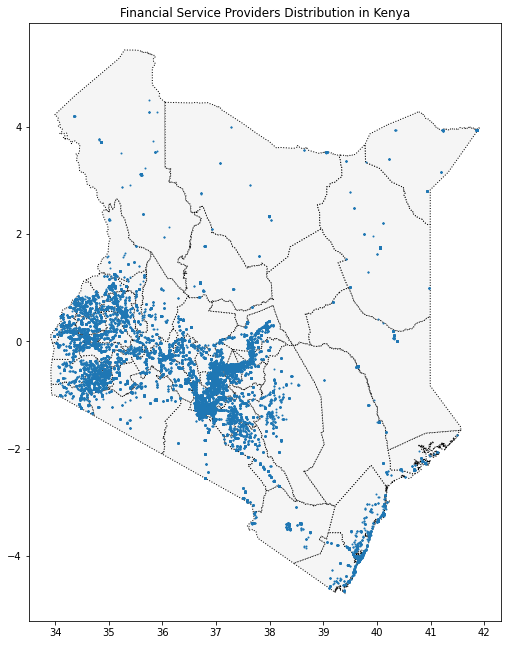

In [ ]:
# Create a map
#to_crs() method modifies only the "geometry" column:
ax = counties.plot(figsize=(12,11), color='whitesmoke', linestyle=':', edgecolor='black')
df_Geo.to_crs(epsg=4326).plot(markersize=1, ax=ax)
plt.title("Financial Service Providers Distribution in Kenya")

# Analysis for Garissa Town

In [ ]:
#Garisa Town Outlets
df_Garisa = df[df['Region']=='Garisa town']
df_Garisa.head()

,Latitude,Longitude,FSP_Type,Region,Address
21152,-1.69345,40.16992,COMMERCIAL BANKS AND MORTGAGE FINANCE COMPANY,Garisa town,Masalani Primary Road
21181,-1.69448,40.17062,Bank Agent,Garisa town,Ijara
21207,-1.69491,40.16995,Mobile Money Service Provider,Garisa town,Hulugho Street
21234,-1.69485,40.16984,Mobile Money Service Provider,Garisa town,Hulugho Street
21262,-1.69516,40.16878,Bank Agent,Garisa town,Hulugho Street


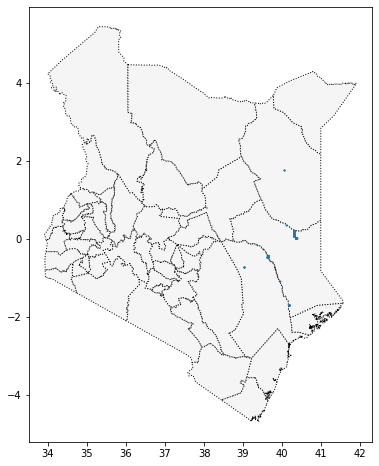

In [ ]:
# Create a map
#to_crs() method modifies only the "geometry" column:
ax = counties.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
df_Garisa_Geo.to_crs(epsg=4326).plot(markersize=1, ax=ax)

In [ ]:
#Convert the DataFrame for Garissa to Geodataframe
df_Garisa_Geo = gpd.GeoDataFrame(df_Garisa, geometry=gpd.points_from_xy(df_Garisa.Longitude, df_Garisa.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
df_Garisa_Geo.crs = {'init': 'epsg:4326'}

## View the first five rows of the GeoDataFrame
df_Garisa_Geo.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Latitude,Longitude,FSP_Type,Region,Address,geometry
21152,-1.69345,40.16992,COMMERCIAL BANKS AND MORTGAGE FINANCE COMPANY,Garisa town,Masalani Primary Road,POINT (40.16992 -1.69345)
21181,-1.69448,40.17062,Bank Agent,Garisa town,Ijara,POINT (40.17062 -1.69448)
21207,-1.69491,40.16995,Mobile Money Service Provider,Garisa town,Hulugho Street,POINT (40.16995 -1.69491)
21234,-1.69485,40.16984,Mobile Money Service Provider,Garisa town,Hulugho Street,POINT (40.16984 -1.69485)
21262,-1.69516,40.16878,Bank Agent,Garisa town,Hulugho Street,POINT (40.16878 -1.69516)


In [ ]:
#Taking the Geo location for garissa town
counties_Garissa = counties[counties['COUNTY'] == 'Garissa']
counties_Garissa

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
11,12,3.642,11.281,13.0,12.0,Garissa,11.281126,3.641823,"POLYGON ((39.29730 0.90783, 39.30076 0.91194, ..."


Text(0.5, 1.0, 'FSP distribution in Garissa county')

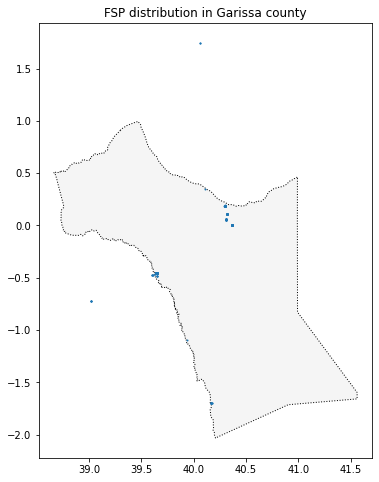

In [ ]:
# Create a map
#to_crs() method modifies only the "geometry" column:
ax = counties_Garissa.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
df_Garisa_Geo.to_crs(epsg=4326).plot(markersize=1, ax=ax)
plt.title('FSP distribution in Garissa county')

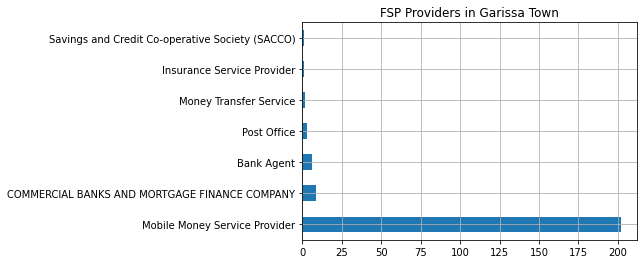

In [ ]:
#checking distribution of FSP in Gsrisa
df_Garisa['FSP_Type'].value_counts().plot(kind="barh")
plt.title("FSP Providers in Garissa Town")
plt.grid(True)
plt.show()

It is a clear identification that Mobile Money Service Providers are the majority with SACCO being the least

In [ ]:
#Checking the street address with the most fsp
df_Garisa['Address'].value_counts().sort_values(ascending=False)

Market                     21
Miraa Road                 15
Ifo Streets                14
Hagadera Road              11
Hagadera Street            10
                           ..
Masalani Primary Road       1
Midnimo Streey              1
Biashara Road               1
Garissa- Masalani Route     1
Bura East                   1
Name: Address, Length: 72, dtype: int64

Market and Miraa Road have the highest number of FSP in garisa town